In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)
df = df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
from datetime import datetime

In [4]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


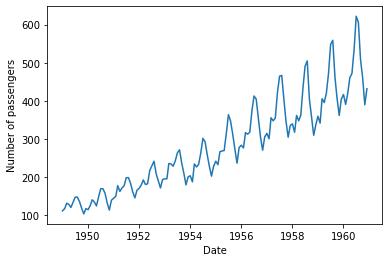

In [5]:
plt.xlabel("Date")
plt.ylabel("Number of passengers")
plt.plot(df)
plt.show()

In [6]:
#Rolling statistics to check for stationary
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std() 

In [7]:
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


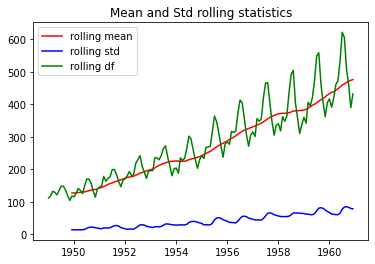

In [8]:
mean_graph = plt.plot(rolmean, color = 'red', label='rolling mean')
std_graph = plt.plot(rolstd, color = 'blue', label='rolling std')
df_graph = plt.plot(df, color = 'green', label='rolling df')
plt.title("Mean and Std rolling statistics")
plt.legend()
plt.show()

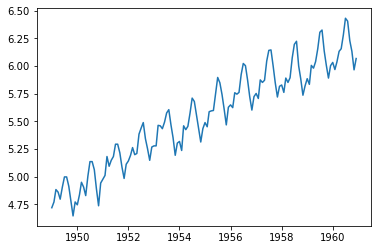

In [9]:
#get the log to estimate the trend
import numpy as np
df_trend = np.log(df)
plt.plot(df_trend)
plt.show()


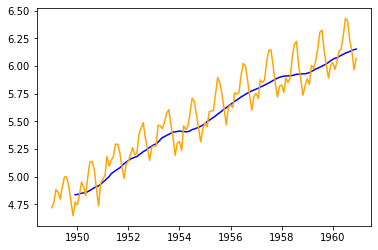

In [10]:
#finding the rolling with the trending dataset
moving_ave = df_trend.rolling(window=12).mean()
moving_std = df_trend.rolling(window=12).mean()
plt.plot(moving_ave, color='blue')
plt.plot(df_trend, color = 'orange')
plt.show()

In [11]:
df_trend_moving_ave = df_trend - moving_ave
df_trend_moving_ave.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [12]:
df_trend_moving_ave.dropna(inplace=True)

In [13]:
df_trend_moving_ave.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


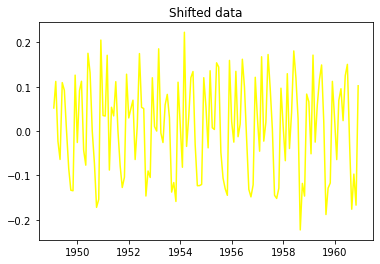

In [14]:
df_shift = df_trend - df_trend.shift()

plt.plot(df_shift, color='yellow', label = "Date")
plt.title("Shifted data")
plt.show()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df_decomposition = seasonal_decompose(df_trend)

trend = df_decomposition.trend
seasonal = df_decomposition.seasonal
residual = df_decomposition.resid

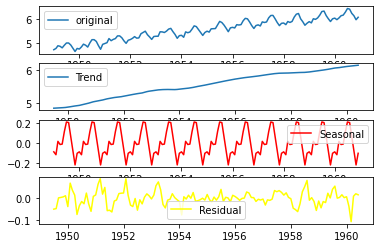

In [17]:
plt.subplot(411)
plt.plot(df_trend, label= 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, color = "Red" ,label= 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, color="Yellow", label= 'Residual')
plt.legend(loc='best')
plt.show()



In [18]:
#acf and pacf graph
from statsmodels.tsa.stattools import acf, pacf

In [19]:
lag_acf = acf(df, nlags =20)
lag_pacf = pacf(df, nlags =20, method = "ols")

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


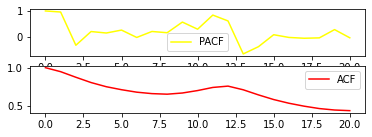

In [20]:
plt.subplot(411)
plt.plot(lag_pacf, color="yellow", label="PACF")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(lag_acf, color="red", label="ACF")
plt.legend(loc='best')
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model_ = ARIMA(df_trend,order=(2,1,2))
result_AR = model_.fit(disp=-1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


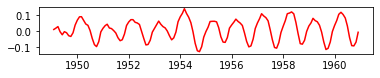

In [23]:
plt.subplot(411)
plt.plot(result_AR.fittedvalues, color="red")

In [24]:
pred_arima = pd.Series(result_AR.fittedvalues, copy=True)

In [25]:
pred_arima

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [26]:
#convert to cummulative sum

pred_arima_cumsum = pred_arima.cumsum()

In [27]:
pred_arima_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64

In [28]:
pred_arima_log = pd.Series(df_trend["#Passengers"], index=df_trend.index)
pred_arima_log = pred_arima_log.add(pred_arima_cumsum, fill_value=0)

In [29]:
pred_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

In [30]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


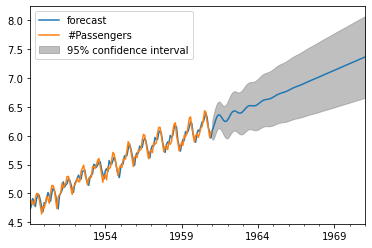

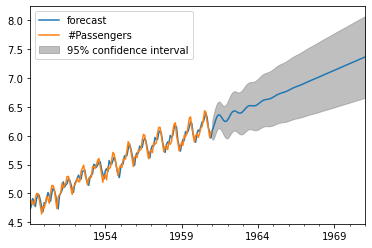

In [31]:
result_AR.plot_predict(1,264)

In [32]:
future_value = result_AR.forecast(steps=120)

In [33]:
future_value

(array([6.09553383, 6.15281384, 6.22442941, 6.29241076, 6.34164696,
        6.36359349, 6.35784682, 6.33139307, 6.29597544, 6.26447713,
        6.24738317, 6.25025153, 6.27275809, 6.30940281, 6.35151463,
        6.38988631, 6.41727365, 6.43011046, 6.42906687, 6.41842488,
        6.40456151, 6.39403605, 6.39183063, 6.40019476, 6.41833661,
        6.44295375, 6.46937407, 6.49293963, 6.51024103, 6.51989023,
        6.52267571, 6.52112378, 6.51864514, 6.51853671, 6.52311898,
        6.53322331, 6.54812838, 6.56591526, 6.58410281, 6.60036517,
        6.61313248, 6.62192765, 6.62737774, 6.63093112, 6.63438669,
        6.63937961, 6.64696476, 6.6573981 , 6.67015293, 6.68414221,
        6.69806598, 6.71077876, 6.72157709, 6.73033962, 6.73749789,
        6.74386355, 6.75037297, 6.75782564, 6.76668651, 6.77699791,
        6.78841287, 6.80032822, 6.81207164, 6.82308731, 6.83307109,
        6.84202466, 6.85022285, 6.85811193, 6.8661731 , 6.87479119,
        6.88416269, 6.8942635 , 6.90487855, 6.91

In [34]:
#save the model with joblib
import pickle

In [35]:
pred_model = pickle.dumps(result_AR)

In [36]:
load_model = pickle.loads(pred_model)

In [37]:
load_model.forecast(steps=24)

(array([6.09553383, 6.15281384, 6.22442941, 6.29241076, 6.34164696,
        6.36359349, 6.35784682, 6.33139307, 6.29597544, 6.26447713,
        6.24738317, 6.25025153, 6.27275809, 6.30940281, 6.35151463,
        6.38988631, 6.41727365, 6.43011046, 6.42906687, 6.41842488,
        6.40456151, 6.39403605, 6.39183063, 6.40019476]),
 array([0.08384711, 0.10749461, 0.11568694, 0.11702774, 0.11703496,
        0.11744017, 0.1176225 , 0.11778713, 0.12024162, 0.12736041,
        0.13870959, 0.15118793, 0.16157815, 0.16834397, 0.17177332,
        0.17311985, 0.17358735, 0.17385461, 0.17430219, 0.17543332,
        0.17788147, 0.18195722, 0.18726217, 0.19283394]),
 array([[5.93119651, 6.25987114],
        [5.94212826, 6.36349941],
        [5.99768717, 6.45117164],
        [6.06304059, 6.52178092],
        [6.11226265, 6.57103126],
        [6.13341499, 6.593772  ],
        [6.12731096, 6.58838268],
        [6.10053453, 6.5622516 ],
        [6.0603062 , 6.53164468],
        [6.01485532, 6.51409894],
